<a href="https://colab.research.google.com/github/sanu1230/Spark_Task/blob/master/Task_3_To_Explore_Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task # 3 - To Explore Unsupervised Machine Learning

#Iris Data Analysis with K-mean clustering

**Objective:**

From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Dataset

In [ ]:
# Load the iris dataset

df_iris = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sparks/Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Understanding Dataset

In [ ]:
df_iris.shape

(150, 6)

In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df_iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Preparing Data

In [ ]:
# Lets Drop Id column as it is irrelavent
df_iris = df_iris.drop('Id', 1)
df_iris.shape

(150, 5)

In [ ]:
# Splitting data into target and labels
X = df_iris.iloc[:, [0, 1, 2, 3]].values

# X = df_iris.drop('Species', 1)
y = df_iris['Species']
type(X)

numpy.ndarray

# Finding Clusters with PCA manual

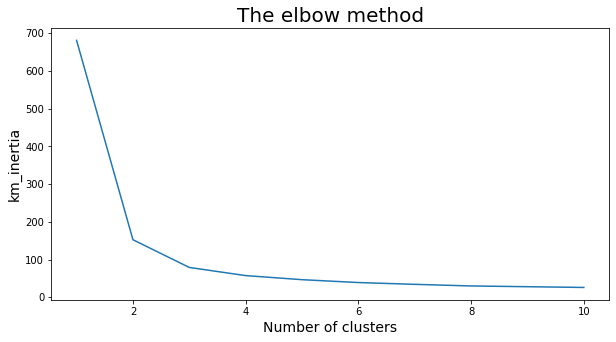

In [ ]:
# Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans

km_inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    km_inertia.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), km_inertia)
plt.title('The elbow method', fontsize=20)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('km_inertia', fontsize=14) # Within cluster sum of squares
plt.show()

**Observation** : Fromt the above graph we see that the elbow or the steep trun is at cluster number 3, Lets use the same to train the model

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

## Visualizing the Clusters

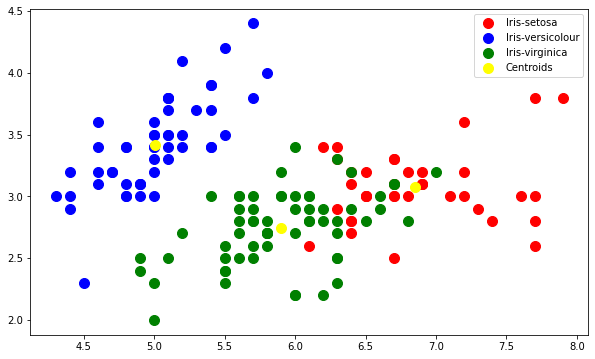

In [ ]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## To find n_components of PCA

In [ ]:
# Finding Covariance matrix
X_cov_matrix = np.cov(X.T)
X_cov_matrix

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [ ]:
# Finding Eigen values and Vectors
eig_vals, eig_vecs = np.linalg.eig(X_cov_matrix)
print('EigenVectors \n %s' %eig_vecs)
print('\nEigenValues \n %s' %eig_vals)

EigenVectors 
 [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]

EigenValues 
 [4.22484077 0.24224357 0.07852391 0.02368303]


In [ ]:
# Making list of (eigenvalues, eigenvectors) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i])for i in range(len(eig_vals))]

# Soting the (eigenvalues, eigenvectors) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizing the list sorted by decereasing eigen values
print('Eigen values in decending order:')

for i in eig_pairs:
  print(i[0])


Eigen values in decending order:
4.22484076832011
0.24224357162751517
0.07852390809415456
0.023683027126001576


In [ ]:
# Finding total of eigen value and calculating variance explained
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
var_exp

[92.46162071742683, 5.301556785053501, 1.71851395250068, 0.5183085450189855]

In [ ]:
# Finding Cumulative Variance explained
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n" , var_exp)
print(40 * "-")
print("Cumulative variance captured as we travel each component: \n" , cum_var_exp)

Variance captured by each component is 
 [92.46162071742683, 5.301556785053501, 1.71851395250068, 0.5183085450189855]
----------------------------------------
Cumulative variance captured as we travel each component: 
 [ 92.46162072  97.7631775   99.48169145 100.        ]


In [ ]:
import pprint
print('All Eigen values along with Eigen vectors')
pprint.pprint(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(4, 1), 
                      eig_pairs[1][1].reshape(4, 1)))

print('Matrix W:\n', matrix_w)

All Eigen values along with Eigen vectors
[(4.22484076832011,
  array([ 0.36158968, -0.08226889,  0.85657211,  0.35884393])),
 (0.24224357162751517,
  array([-0.65653988, -0.72971237,  0.1757674 ,  0.07470647])),
 (0.07852390809415456,
  array([-0.58099728,  0.59641809,  0.07252408,  0.54906091])),
 (0.023683027126001576,
  array([ 0.31725455, -0.32409435, -0.47971899,  0.75112056]))]
----------------------------------------
Matrix W:
 [[ 0.36158968 -0.65653988]
 [-0.08226889 -0.72971237]
 [ 0.85657211  0.1757674 ]
 [ 0.35884393  0.07470647]]


**Observation:** The above results shows that the first two components in the array make upto 97% of the principle components. Hence, PCA n_components can be used as 2

In [ ]:
Y = X.dot(matrix_w)
Y[:5]

array([[ 2.82713597, -5.64133105],
       [ 2.79595248, -5.14516688],
       [ 2.62152356, -5.17737812],
       [ 2.7649059 , -5.00359942],
       [ 2.78275012, -5.64864829]])

In [ ]:
# Label Encoding y 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded[:5]

array([0, 0, 0, 0, 0])

In [ ]:
y_encoded.shape

(150,)

In [ ]:
Y.shape

(150, 2)

Text(0.5, 1.0, 'Clustering with PCA manual of IRIS Dataset')

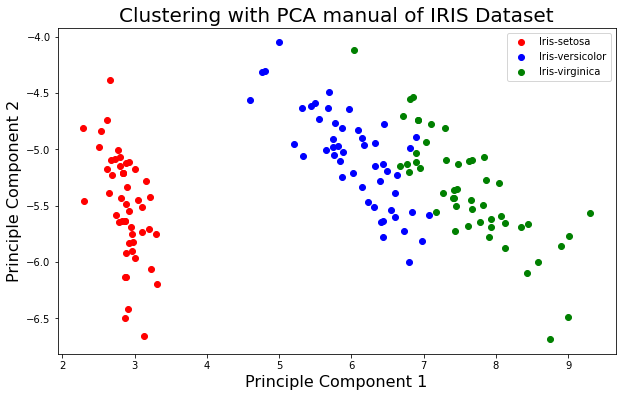

In [ ]:
import pylab as pl
pl.figure(figsize=(10, 6))
target_names = y.unique()
for c, i, target_name in zip('rbg', [0, 1, 2], target_names):
  pl.scatter(Y[y_encoded==i, 0], Y[y_encoded==i, 1], c=c, label=target_name)
pl.xlabel('Principle Component 1', fontsize=16)
pl.ylabel('Principle Component 2', fontsize=16)
pl.legend()
pl.title('Clustering with PCA manual of IRIS Dataset', fontsize=20)

# Redoing clustering with PCA function from sklearn

In [ ]:
from sklearn.decomposition import PCA
from itertools import cycle

pca = PCA(n_components=2, whiten=True)
pca.fit(X)
pca_X = pca.transform(X)
pca_X[:5]

array([[-1.3059028 ,  0.66358991],
       [-1.32107398, -0.34449998],
       [-1.405936  , -0.27905426],
       [-1.33617856, -0.63213207],
       [-1.32749711,  0.67845686]])

In [ ]:
# To find principle component attribute

print(pca.components_)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]


In [ ]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461621 0.05301557]
0.9776317750248035


Text(0.5, 1.0, 'Clustering with PCA sklearn of IRIS Dataset')

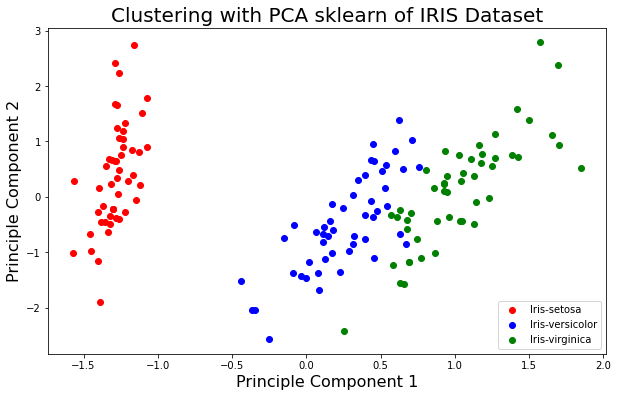

In [ ]:
import pylab as pl
pl.figure(figsize=(10, 6))
target_names = y.unique()
for c, i, target_name in zip('rbg', [0, 1, 2], target_names):
  pl.scatter(pca_X[y_encoded==i, 0], pca_X[y_encoded==i, 1], c=c, label=target_name)
pl.xlabel('Principle Component 1', fontsize=16)
pl.ylabel('Principle Component 2', fontsize=16)
pl.legend()
pl.title('Clustering with PCA sklearn of IRIS Dataset', fontsize=20)